In [69]:
import pandas as pd
import numpy as np

In [70]:
import pickle
with open('../data/Chibab_date_menu.pkl', 'rb') as f:
    data = pickle.load(f)

In [71]:
len(data[0]) # 1000개의 거래 데이터

1000

# 데이터 정제

## 날짜/메뉴 데이터 병합

In [72]:
# 메뉴 리스트 정제 함수
def cleaner1(data, drop):
    dic = {}
    n = 0
    dic[0] = []
    exc = ['', '배달팁', '(A) 매출금액', '(B) 고객할인비용', '(C) 차감금액', '(D) 부가세', '(E) 만나서결제금액', '입금예정금액 (A+B+C+D)', '입금예정금액 (A+B+C+D+E)']
    for i in range(len(drop)):
        exc.append(drop[i])

    for i in data[1]:
        if i == '총 결제금액':
            n += 1
            dic[n] = []
            pass
        elif i in exc:
            pass
        else:
            dic[n].append(i)
    space = len(dic)-1
    del dic[space]
    return list(dic.values())

In [73]:
# 날짜와 병합하여 df 만들기
drops = ['┗ 기본', '┗ 기본양념', '┗ 350ml', '┗ 355ml', '┗ 500ml', '┗ 1.25L', '┗ 1.5L', '┗ 병'] # 메뉴 제외 리스트
df = pd.concat((pd.DataFrame([i.split('\n') for i in data[0]]), pd.DataFrame(pd.Series(cleaner1(data, drop=drops)))), axis=1)
df.columns = ['date', 'time', 'menu']
df

,date,time,menu
0,2022. 06. 24. (금),오후 09:48:50,"[직화바베큐 치밥도시락\n1개, ┗ ㄹlㅇ뷰 ㅇl벤트(쿨피스350ml)]"
1,2022. 06. 24. (금),오후 06:38:13,"[갈비천왕 치밥도시락\n1개, ┗ 고기 100g 추가, ┗ 공기밥 1인분 추가, 양..."
2,2022. 06. 24. (금),오후 06:02:02,"[마늘간장 치밥도시락\n1개, ┗ 김말이 4개, ┗ 피카츄돈까스 1개, ┗ 마늘간장]"
3,2022. 06. 24. (금),오후 05:44:23,"[직화 바베큐 치밥 시키면 미니떡볶이 서비스\n1개, ┗ 소떡소떡 1개, ┗ 중간맛..."
4,2022. 06. 24. (금),오후 12:07:37,"[갈비천왕 치밥도시락\n1개, ┗ ㄹlㅇ뷰 ㅇl벤트(왕새우 튀김 2개), 직화양념 ..."
...,...,...,...
995,2022. 01. 09. (일),오후 12:37:52,"[직화바베큐 치밥도시락\n1개, ┗ 고기 100g 추가, ┗ 푸딩스퇄 계란찜 小 추가]"
996,2022. 01. 09. (일),오전 10:48:42,"[갈비천왕 치밥도시락\n1개, ┗ 치즈떡 4개 추가, ┗ 쫄깃 밀떡 10개 추가, ..."
997,2022. 01. 08. (토),오후 08:21:04,"[고기만 2배 (밥X)\n1개, ┗ 라이스 찰고구마볼 4개, ┗ 직화양념 (매콤) ..."
998,2022. 01. 08. (토),오후 12:33:36,"[갈비천왕 치밥 시키면 미니떡볶이 서비스\n1개, ┗ 순한맛, 직화바베큐 치밥도시락..."


포함 할 메뉴 리스트 확인

In [74]:
li = []
for me in list(df['menu']):
    for m in me:
        if m not in li:
            li.append(m)
li

['직화바베큐 치밥도시락\n1개',
 '┗ ㄹlㅇ뷰 ㅇl벤트(쿨피스350ml)',
 '갈비천왕 치밥도시락\n1개',
 '┗ 고기 100g 추가',
 '┗ 공기밥 1인분 추가',
 '양념치킨 치밥도시락\n1개',
 '마늘간장 치밥도시락\n1개',
 '┗ 김말이 4개',
 '┗ 피카츄돈까스 1개',
 '┗ 마늘간장',
 '직화 바베큐 치밥 시키면 미니떡볶이 서비스\n1개',
 '┗ 소떡소떡 1개',
 '┗ 중간맛',
 '매콤양념 치밥도시락\n1개',
 '┗ 한입핫도그 5개',
 '┗ ㄹlㅇ뷰 ㅇl벤트(비엔나 소세지5개)',
 '┗ ㄹlㅇ뷰 ㅇl벤트(왕새우 튀김 2개)',
 '직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개',
 '갈비천왕 치밥도시락\n2개',
 '┗ 쫄깃 밀떡 10개 추가',
 '┗ 비엔나소세지 5개 추가',
 '┗ 메추리알 6개 추가',
 '직화양념 치밥도시락 (매콤) (지코X 스타일)\n2개',
 '직화바베큐 치밥도시락\n2개',
 '┗ 야끼만두 5개',
 '┗ 푸딩스퇄 계란찜 大 추가',
 '┗ 쿨피스 캔 350ml 추가',
 '매콤간장 치밥도시락\n1개',
 '갈비천왕 치밥 시키면 미니떡볶이 서비스\n1개',
 '┗ 순한맛',
 '┗ 오징어튀김 2개',
 '┗ 체다슬라이스 치즈 2장',
 '┗ 매콤양념',
 '┗ ㄹlㅇ뷰 ㅇl벤트( 메추리알4개)',
 '┗ 깍두기 추가',
 '매콤간장 치밥도시락\n2개',
 '┗ 펩시콜라 1.25L 추가',
 '쿨피스 캔(복숭아맛)\n1개',
 '펩시콜라\n1개',
 '┗ 치즈떡 4개 추가',
 '고기만 2배 (밥X)\n1개',
 '┗ 직화양념 (매콤) (지코X 스타일)',
 '┗ 수제 등심돈까츠',
 '직화양념(매콤)(지코X) 치밥 시키면 미니떡볶이 서비스\n1개',
 '┗ 직화바베큐',
 '┗ 계란후라이 1개 추가',
 '┗ 펩시콜라 500ml 추가',
 '┗ 갈비천왕',
 '┗ 미니떡볶이',
 '┗ 단무지 추가',
 '┗ 우유튀김 5개',
 '┗ 15cm 왕새우튀김 2개',
 '┗ 공기밥 2인분 

## 점심 시간 정보 추가

In [75]:
df.loc[df['time'].apply(lambda x: x[:2] == '오전'), 'Hour'] = 'Lunch'
#df.loc[df['time'].apply(lambda x: x[:2] == '오후'), 'Hour'] = 'Dinner'
df.loc[df['time'].apply(lambda x: x[:5] == '오후 12'), 'Hour'] = 'Lunch'
df

,date,time,menu,Hour
0,2022. 06. 24. (금),오후 09:48:50,"[직화바베큐 치밥도시락\n1개, ┗ ㄹlㅇ뷰 ㅇl벤트(쿨피스350ml)]",NaN
1,2022. 06. 24. (금),오후 06:38:13,"[갈비천왕 치밥도시락\n1개, ┗ 고기 100g 추가, ┗ 공기밥 1인분 추가, 양...",NaN
2,2022. 06. 24. (금),오후 06:02:02,"[마늘간장 치밥도시락\n1개, ┗ 김말이 4개, ┗ 피카츄돈까스 1개, ┗ 마늘간장]",NaN
3,2022. 06. 24. (금),오후 05:44:23,"[직화 바베큐 치밥 시키면 미니떡볶이 서비스\n1개, ┗ 소떡소떡 1개, ┗ 중간맛...",NaN
4,2022. 06. 24. (금),오후 12:07:37,"[갈비천왕 치밥도시락\n1개, ┗ ㄹlㅇ뷰 ㅇl벤트(왕새우 튀김 2개), 직화양념 ...",Lunch
...,...,...,...,...
995,2022. 01. 09. (일),오후 12:37:52,"[직화바베큐 치밥도시락\n1개, ┗ 고기 100g 추가, ┗ 푸딩스퇄 계란찜 小 추가]",Lunch
996,2022. 01. 09. (일),오전 10:48:42,"[갈비천왕 치밥도시락\n1개, ┗ 치즈떡 4개 추가, ┗ 쫄깃 밀떡 10개 추가, ...",Lunch
997,2022. 01. 08. (토),오후 08:21:04,"[고기만 2배 (밥X)\n1개, ┗ 라이스 찰고구마볼 4개, ┗ 직화양념 (매콤) ...",NaN
998,2022. 01. 08. (토),오후 12:33:36,"[갈비천왕 치밥 시키면 미니떡볶이 서비스\n1개, ┗ 순한맛, 직화바베큐 치밥도시락...",Lunch


In [76]:
df_Hour = pd.get_dummies(df['Hour'])
#df_Hour.loc[df_Hour['Dinner']==1, 'Dinner'] = True
#df_Hour.loc[df_Hour['Dinner']==0, 'Dinner'] = False
df_Hour.loc[df_Hour['Lunch']==1, 'Lunch'] = True
df_Hour.loc[df_Hour['Lunch']==0, 'Lunch'] = False
df_Hour

,Lunch
0,False
1,False
2,False
3,False
4,True
...,...
995,True
996,True
997,False
998,True


# 연관규칙 마이닝: Apriori

In [77]:
# apriori 알고리즘
from mlxtend.frequent_patterns import apriori, association_rules

# 연관분석용 데이터 파일 변환
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

%matplotlib inline

In [78]:
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

## 1. 거래 데이터 생성

In [79]:
basket = list(df['menu'])

In [80]:
te = TransactionEncoder()
ted = te.fit(basket).transform(basket)
ted

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [81]:
ARM_df = pd.DataFrame(ted, columns=te.columns_)
ARM_df = pd.concat([ARM_df, df_Hour], axis=1) # 시간정보 병합
ARM_df

,┗ 15cm 왕새우튀김 2개,┗ ㄹlㅇ뷰 ㅇl벤트( 메추리알4개),┗ ㄹlㅇ뷰 ㅇl벤트(비엔나 소세지5개),┗ ㄹlㅇ뷰 ㅇl벤트(왕새우 튀김 2개),┗ ㄹlㅇ뷰 ㅇl벤트(쿨피스350ml),┗ 갈비천왕,┗ 계란후라이 1개 추가,┗ 고구마튀김 4개,┗ 고기 100g 추가,┗ 공기밥 1인분 추가,...,진로 이즈백\n1개,참이슬 후레쉬\n1개,참이슬 후레쉬\n2개,칠성사이다\n1개,쿨피스 캔(복숭아맛)\n1개,쿨피스 캔(복숭아맛)\n2개,테라\n1개,테라\n2개,펩시콜라\n1개,Lunch
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## 2. 탐색적 데이터 분석

In [82]:
freq = ARM_df.sum().to_frame('Frequency')
freq_sort = freq.sort_values('Frequency', ascending = False)
freq_sort = freq_sort[freq_sort['Frequency'] > 1] # 빈도수가 1인 메뉴 제외

In [83]:
freq_sort['Support'] = freq_sort['Frequency'] / len(ARM_df)
freq_sort

,Frequency,Support
직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개,335,0.335
Lunch,313,0.313
직화바베큐 치밥도시락\n1개,235,0.235
갈비천왕 치밥도시락\n1개,232,0.232
┗ 고기 100g 추가,159,0.159
...,...,...
로제치밥 시키면 미니떡볶이 서비스\n1개,3,0.003
진로 이즈백\n1개,2,0.002
테라\n1개,2,0.002
직화바베큐 치밥도시락\n3개,2,0.002


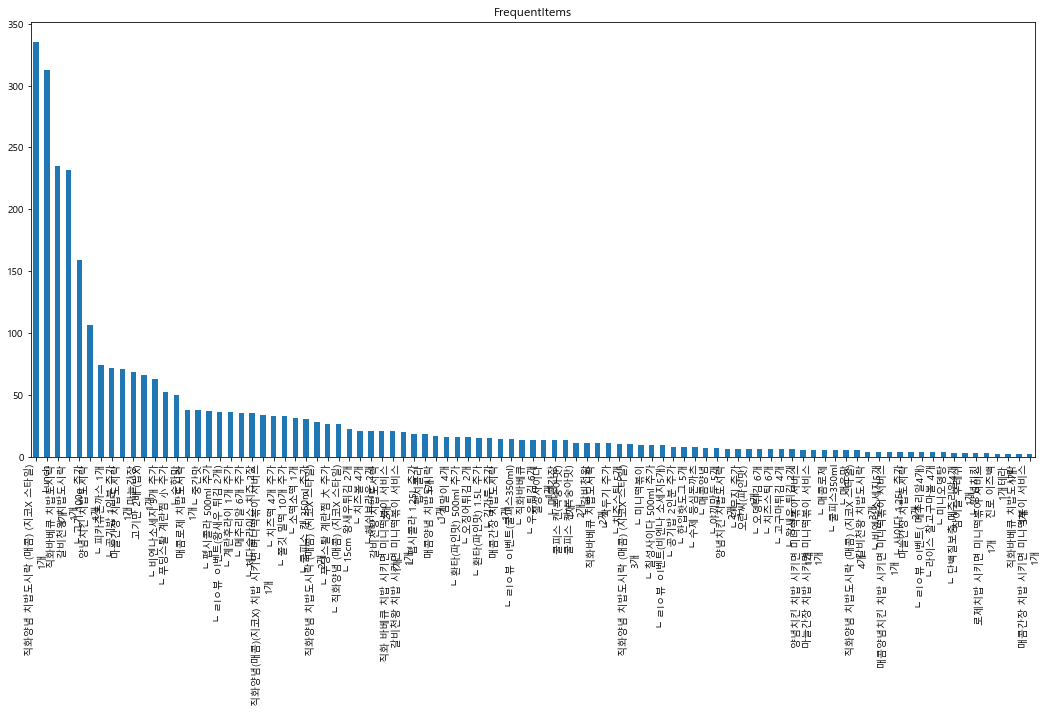

In [84]:
freq_sort['Frequency'].plot(kind='bar', title='FrequentItems', figsize = (18, 8));

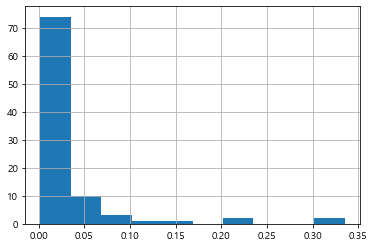

In [85]:
freq_sort['Support'].hist();

## 3. 연관규칙 생성

최소지지도 0.01일 때, 빈발항목집합 148개

In [93]:
freq_items = apriori(ARM_df, min_support=0.007, use_colnames=True)
freq_items

,support,itemsets
0,0.022,(┗ 15cm 왕새우튀김 2개)
1,0.009,(┗ ㄹlㅇ뷰 ㅇl벤트(비엔나 소세지5개))
2,0.036,(┗ ㄹlㅇ뷰 ㅇl벤트(왕새우 튀김 2개))
3,0.014,(┗ ㄹlㅇ뷰 ㅇl벤트(쿨피스350ml))
4,0.011,(┗ 갈비천왕)
...,...,...
218,0.008,"(Lunch, 고기만 2배 (밥X)\n1개, ┗ 직화양념 (매콤) (지코X 스타일))"
219,0.008,"(직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개, 직화바베큐 치밥도시락\n1..."
220,0.014,"(Lunch, 직화바베큐 치밥도시락\n1개, 갈비천왕 치밥도시락\n1개)"
221,0.02,"(Lunch, 직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개, 갈비천왕 치밥..."


최소 신뢰도가 0.6일때, 연관규칙 14개 생성

In [94]:
rules = association_rules(freq_items, metric = 'confidence', min_threshold = 0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(┗ ㄹlㅇ뷰 ㅇl벤트(쿨피스350ml)),(직화바베큐 치밥도시락\n1개),0.014,0.235,0.007,0.500000,2.127660,0.003710,1.530000
1,(┗ 갈비천왕),(고기만 2배 (밥X)\n1개),0.011,0.066,0.011,1.000000,15.151515,0.010274,inf
2,(┗ 해쉬브라운 2개),(┗ 고기 100g 추가),0.021,0.159,0.012,0.571429,3.593890,0.008661,1.962333
3,(┗ 공기밥 1인분 추가),(직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개),0.072,0.335,0.036,0.500000,1.492537,0.011880,1.330000
4,(┗ 김말이 4개),(직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개),0.016,0.335,0.009,0.562500,1.679104,0.003640,1.520000
5,(┗ 마늘간장),(마늘간장 치밥도시락\n1개),0.068,0.071,0.061,0.897059,12.634631,0.056172,9.024571
6,(마늘간장 치밥도시락\n1개),(┗ 마늘간장),0.071,0.068,0.061,0.859155,12.634631,0.056172,6.617200
7,(┗ 매콤간장),(마늘간장 치밥도시락\n1개),0.013,0.071,0.011,0.846154,11.917660,0.010077,6.038500
8,(갈비천왕 치밥 시키면 미니떡볶이 서비스\n1개),(┗ 순한맛),0.020,0.050,0.015,0.750000,15.000000,0.014000,3.800000
9,(┗ 오징어튀김 2개),(직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개),0.016,0.335,0.009,0.562500,1.679104,0.003640,1.520000


향상도가 1 이상인 연관규칙

In [95]:
rules = rules[(rules['lift'] > 1)]
rules.sort_values(by = 'confidence', ascending = False) #신뢰도 순으로 나열

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41,"(Lunch, ┗ 직화양념 (매콤) (지코X 스타일))",(고기만 2배 (밥X)\n1개),0.008,0.066,0.008,1.000000,15.151515,0.007472,inf
37,"(직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개, ┗ 마늘간장)",(마늘간장 치밥도시락\n1개),0.007,0.071,0.007,1.000000,14.084507,0.006503,inf
34,"(마늘간장 치밥도시락\n1개, 양념치킨 치밥도시락\n1개)",(┗ 마늘간장),0.009,0.068,0.009,1.000000,14.705882,0.008388,inf
13,(┗ 직화양념 (매콤) (지코X 스타일)),(고기만 2배 (밥X)\n1개),0.026,0.066,0.026,1.000000,15.151515,0.024284,inf
12,(┗ 직화바베큐),(고기만 2배 (밥X)\n1개),0.013,0.066,0.013,1.000000,15.151515,0.012142,inf
1,(┗ 갈비천왕),(고기만 2배 (밥X)\n1개),0.011,0.066,0.011,1.000000,15.151515,0.010274,inf
38,"(직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개, 마늘간장 치밥도시락\n1개)",(┗ 마늘간장),0.007,0.068,0.007,1.000000,14.705882,0.006524,inf
36,"(직화바베큐 치밥도시락\n1개, 마늘간장 치밥도시락\n1개)",(┗ 마늘간장),0.012,0.068,0.011,0.916667,13.480392,0.010184,11.184000
39,"(Lunch, ┗ 마늘간장)",(마늘간장 치밥도시락\n1개),0.024,0.071,0.022,0.916667,12.910798,0.020296,11.148000
35,"(┗ 마늘간장, 직화바베큐 치밥도시락\n1개)",(마늘간장 치밥도시락\n1개),0.012,0.071,0.011,0.916667,12.910798,0.010148,11.148000


- 조건부에 'Lunch'가 있는 규칙

In [96]:
rules[rules.antecedents.apply(lambda x:'Lunch' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,"(Lunch, ┗ 공기밥 1인분 추가)",(직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개),0.017,0.335,0.010,0.588235,1.755926,0.004305,1.615000
39,"(Lunch, ┗ 마늘간장)",(마늘간장 치밥도시락\n1개),0.024,0.071,0.022,0.916667,12.910798,0.020296,11.148000
40,"(Lunch, 마늘간장 치밥도시락\n1개)",(┗ 마늘간장),0.025,0.068,0.022,0.880000,12.941176,0.020300,7.766667
41,"(Lunch, ┗ 직화양념 (매콤) (지코X 스타일))",(고기만 2배 (밥X)\n1개),0.008,0.066,0.008,1.000000,15.151515,0.007472,inf


- 결론구에 'Lunch'가 있는 규칙

In [97]:
rules[rules.consequents.apply(lambda x:'Lunch' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,(매콤간장 치밥도시락\n1개),(Lunch),0.014,0.313,0.007,0.500000,1.597444,0.002618,1.374000
18,(직화양념 치밥도시락 (매콤) (지코X 스타일)\n2개),(Lunch),0.028,0.313,0.017,0.607143,1.939754,0.008236,1.748727
19,(직화양념 치밥도시락 (매콤) (지코X 스타일)\n3개),(Lunch),0.010,0.313,0.009,0.900000,2.875399,0.005870,6.870000


 지난 6개월 간 주문 내역을 최소지지도 0.007, 최소신뢰도 0.5로 분석한 결과, **점심이고 '직화양념 치밥 도시락'을 주문**할 때, **'고기만 두 배'** 옵션을 선택하는 연관규칙의 신뢰도가 1, **점심이고 '밥 추가'** 를 선택한 경우 **직화양념 치밥 도시락**을 선택하는 규칙의 신뢰도가 약 0.58이었다. 이는 점심시간대에 '직화양념 치밥도시락'을 시키는 경우는 무조건 1인분 이상을 주문한다는 것을 의미한다.\
 더해서, '직화양념 치밥 도시락'을 여러개 시킬 때 점심시간대인 연관규칙의 신뢰도는 0.6~0.9로 높았다. 따라서 직화양념 치밥 도시락의 양이 점심시간 주문에 영향을 끼친다는 사실을 알 수 있다.

 이러한 결과는 `직장인들이 간편한 점심식사로 치밥을 선택하고 있다`는 사실을 뒷받침하며, 특히, `직화양념 치밥 도시락`이 주로 선택되고 있다는 것을 보여준다.

# 점심시간대 데이터만 사용

In [50]:
df_Lunch = pd.concat((pd.DataFrame([i.split('\n') for i in data[0]]), pd.DataFrame(pd.Series(cleaner1(data, drop=drops)))), axis=1)
df_Lunch.columns = ['date', 'time', 'menu']
df_Lunch

,date,time,menu
0,2022. 06. 24. (금),오후 09:48:50,"[직화바베큐 치밥도시락\n1개, ┗ ㄹlㅇ뷰 ㅇl벤트(쿨피스350ml)]"
1,2022. 06. 24. (금),오후 06:38:13,"[갈비천왕 치밥도시락\n1개, ┗ 고기 100g 추가, ┗ 공기밥 1인분 추가, 양..."
2,2022. 06. 24. (금),오후 06:02:02,"[마늘간장 치밥도시락\n1개, ┗ 김말이 4개, ┗ 피카츄돈까스 1개, ┗ 마늘간장]"
3,2022. 06. 24. (금),오후 05:44:23,"[직화 바베큐 치밥 시키면 미니떡볶이 서비스\n1개, ┗ 소떡소떡 1개, ┗ 중간맛..."
4,2022. 06. 24. (금),오후 12:07:37,"[갈비천왕 치밥도시락\n1개, ┗ ㄹlㅇ뷰 ㅇl벤트(왕새우 튀김 2개), 직화양념 ..."
...,...,...,...
995,2022. 01. 09. (일),오후 12:37:52,"[직화바베큐 치밥도시락\n1개, ┗ 고기 100g 추가, ┗ 푸딩스퇄 계란찜 小 추가]"
996,2022. 01. 09. (일),오전 10:48:42,"[갈비천왕 치밥도시락\n1개, ┗ 치즈떡 4개 추가, ┗ 쫄깃 밀떡 10개 추가, ..."
997,2022. 01. 08. (토),오후 08:21:04,"[고기만 2배 (밥X)\n1개, ┗ 라이스 찰고구마볼 4개, ┗ 직화양념 (매콤) ..."
998,2022. 01. 08. (토),오후 12:33:36,"[갈비천왕 치밥 시키면 미니떡볶이 서비스\n1개, ┗ 순한맛, 직화바베큐 치밥도시락..."


In [51]:
df_Lunch = df_Lunch[df_Lunch['time'].apply(lambda x: (x[:2]=='오전')|(x[:5]=='오후 12'))]
df_Lunch

,date,time,menu
4,2022. 06. 24. (금),오후 12:07:37,"[갈비천왕 치밥도시락\n1개, ┗ ㄹlㅇ뷰 ㅇl벤트(왕새우 튀김 2개), 직화양념 ..."
9,2022. 06. 23. (목),오후 12:09:42,"[직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개, ┗ 고기 100g 추가, ..."
10,2022. 06. 23. (목),오전 11:52:36,"[직화양념 치밥도시락 (매콤) (지코X 스타일)\n2개, 마늘간장 치밥도시락\n1개..."
11,2022. 06. 23. (목),오전 10:50:14,"[마늘간장 치밥도시락\n1개, ┗ 마늘간장, 직화바베큐 치밥도시락\n2개]"
27,2022. 06. 20. (월),오후 12:26:19,"[직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개, ┗ ㄹlㅇ뷰 ㅇl벤트( 메..."
...,...,...,...
987,2022. 01. 10. (월),오전 10:56:56,"[고기만 2배 (밥X)\n1개, ┗ 갈비천왕, 직화바베큐 치밥도시락\n1개]"
995,2022. 01. 09. (일),오후 12:37:52,"[직화바베큐 치밥도시락\n1개, ┗ 고기 100g 추가, ┗ 푸딩스퇄 계란찜 小 추가]"
996,2022. 01. 09. (일),오전 10:48:42,"[갈비천왕 치밥도시락\n1개, ┗ 치즈떡 4개 추가, ┗ 쫄깃 밀떡 10개 추가, ..."
998,2022. 01. 08. (토),오후 12:33:36,"[갈비천왕 치밥 시키면 미니떡볶이 서비스\n1개, ┗ 순한맛, 직화바베큐 치밥도시락..."


In [54]:
te = TransactionEncoder()
ted_Lunch = te.fit(list(df_Lunch['menu'])).transform(list(df_Lunch['menu']))
ARM_df_Lunch = pd.DataFrame(ted_Lunch, columns=te.columns_)

# 빈도수
freq_Lun = ARM_df_Lunch.sum().to_frame('Frequency')
freq_sort_Lun = freq_Lun.sort_values('Frequency', ascending = False)
freq_sort_Lun = freq_sort_Lun[freq_sort_Lun['Frequency'] > 1] # 빈도수가 1인 메뉴 제외

# 지지도 계산
freq_sort_Lun['Support'] = freq_sort_Lun['Frequency'] / len(ARM_df_Lunch)
freq_sort_Lun

,Frequency,Support
직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개,102,0.325879
갈비천왕 치밥도시락\n1개,82,0.261981
직화바베큐 치밥도시락\n1개,76,0.242812
┗ 고기 100g 추가,41,0.130990
양념치킨 치밥도시락\n1개,31,0.099042
...,...,...
┗ 야끼만두 5개,2,0.006390
┗ 칠성사이다 500ml 추가,2,0.006390
┗ 매콤로제,2,0.006390
┗ ㄹlㅇ뷰 ㅇl벤트( 메추리알4개),2,0.006390


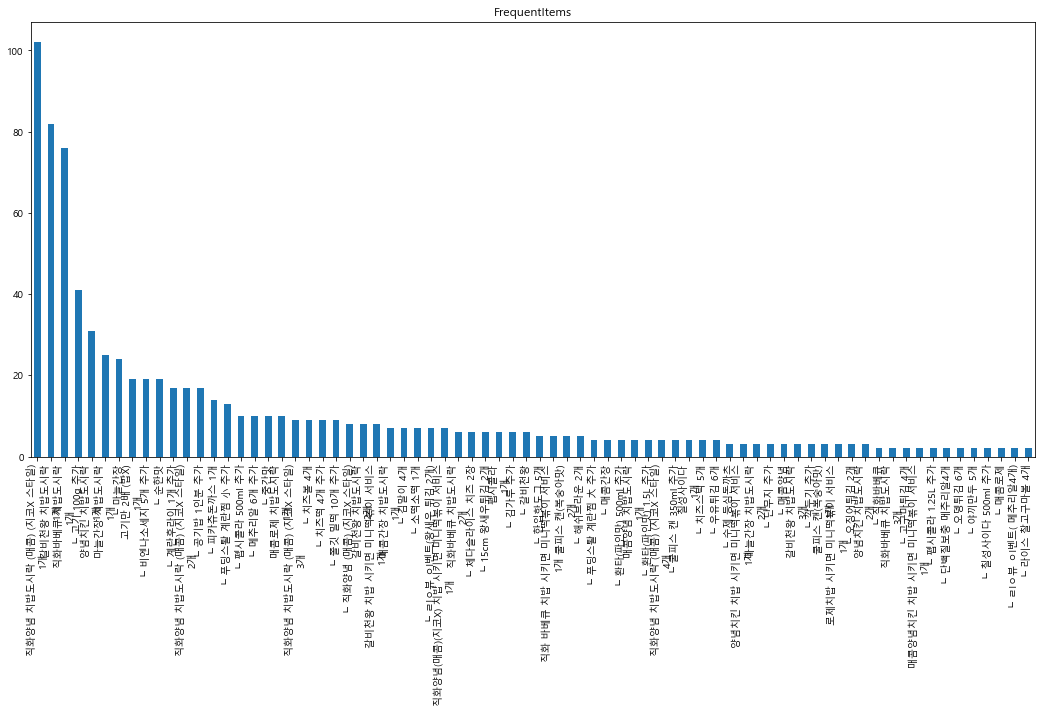

In [55]:
freq_sort_Lun['Frequency'].plot(kind='bar', title='FrequentItems', figsize = (18, 8));

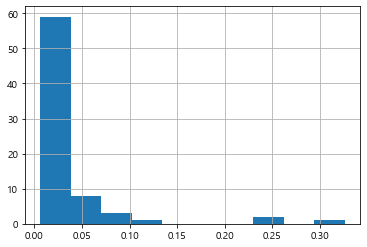

In [56]:
freq_sort_Lun['Support'].hist();

## ARM

In [67]:
itemsets = apriori(ARM_df_Lunch, min_support=0.01, use_colnames=True)
rules_Lun = association_rules(itemsets, metric = 'confidence', min_threshold = 0.6)
rules_Lun

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(┗ ㄹlㅇ뷰 ㅇl벤트(왕새우 튀김 2개)),(직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개),0.022364,0.325879,0.015974,0.714286,2.191877,0.008686,2.359425
1,(┗ 갈비천왕),(고기만 2배 (밥X)\n1개),0.019169,0.060703,0.019169,1.000000,16.473684,0.018006,inf
2,(┗ 마늘간장),(마늘간장 치밥도시락\n1개),0.076677,0.079872,0.070288,0.916667,11.476667,0.064163,11.041534
3,(마늘간장 치밥도시락\n1개),(┗ 마늘간장),0.079872,0.076677,0.070288,0.880000,11.476667,0.064163,7.694356
4,(┗ 매콤간장),(마늘간장 치밥도시락\n1개),0.012780,0.079872,0.012780,1.000000,12.520000,0.011759,inf
5,(갈비천왕 치밥 시키면 미니떡볶이 서비스\n1개),(┗ 순한맛),0.025559,0.060703,0.019169,0.750000,12.355263,0.017618,3.757188
6,(┗ 직화양념 (매콤) (지코X 스타일)),(고기만 2배 (밥X)\n1개),0.025559,0.060703,0.025559,1.000000,16.473684,0.024008,inf
7,(┗ 푸딩스퇄 계란찜 大 추가),(직화바베큐 치밥도시락\n1개),0.012780,0.242812,0.012780,1.000000,4.118421,0.009677,inf
8,(펩시콜라\n1개),(직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개),0.019169,0.325879,0.015974,0.833333,2.557190,0.009728,4.044728
9,"(┗ 고기 100g 추가, ┗ 공기밥 1인분 추가)",(직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개),0.022364,0.325879,0.015974,0.714286,2.191877,0.008686,2.359425


In [68]:
rules_Lun = rules_Lun[(rules_Lun['lift'] > 1)]
rules_Lun.sort_values(by = 'confidence', ascending = False) #신뢰도 순으로 나열

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(┗ 갈비천왕),(고기만 2배 (밥X)\n1개),0.019169,0.060703,0.019169,1.000000,16.473684,0.018006,inf
4,(┗ 매콤간장),(마늘간장 치밥도시락\n1개),0.012780,0.079872,0.012780,1.000000,12.520000,0.011759,inf
6,(┗ 직화양념 (매콤) (지코X 스타일)),(고기만 2배 (밥X)\n1개),0.025559,0.060703,0.025559,1.000000,16.473684,0.024008,inf
7,(┗ 푸딩스퇄 계란찜 大 추가),(직화바베큐 치밥도시락\n1개),0.012780,0.242812,0.012780,1.000000,4.118421,0.009677,inf
11,"(갈비천왕 치밥도시락\n1개, 마늘간장 치밥도시락\n1개)",(┗ 마늘간장),0.012780,0.076677,0.012780,1.000000,13.041667,0.011800,inf
12,"(┗ 마늘간장, 양념치킨 치밥도시락\n1개)",(마늘간장 치밥도시락\n1개),0.019169,0.079872,0.019169,1.000000,12.520000,0.017638,inf
13,"(마늘간장 치밥도시락\n1개, 양념치킨 치밥도시락\n1개)",(┗ 마늘간장),0.019169,0.076677,0.019169,1.000000,13.041667,0.017699,inf
15,"(직화바베큐 치밥도시락\n1개, 마늘간장 치밥도시락\n1개)",(┗ 마늘간장),0.015974,0.076677,0.015974,1.000000,13.041667,0.014750,inf
2,(┗ 마늘간장),(마늘간장 치밥도시락\n1개),0.076677,0.079872,0.070288,0.916667,11.476667,0.064163,11.041534
3,(마늘간장 치밥도시락\n1개),(┗ 마늘간장),0.079872,0.076677,0.070288,0.880000,11.476667,0.064163,7.694356
